# 🗓️ Create Calendar Heatmap Using Python 📊


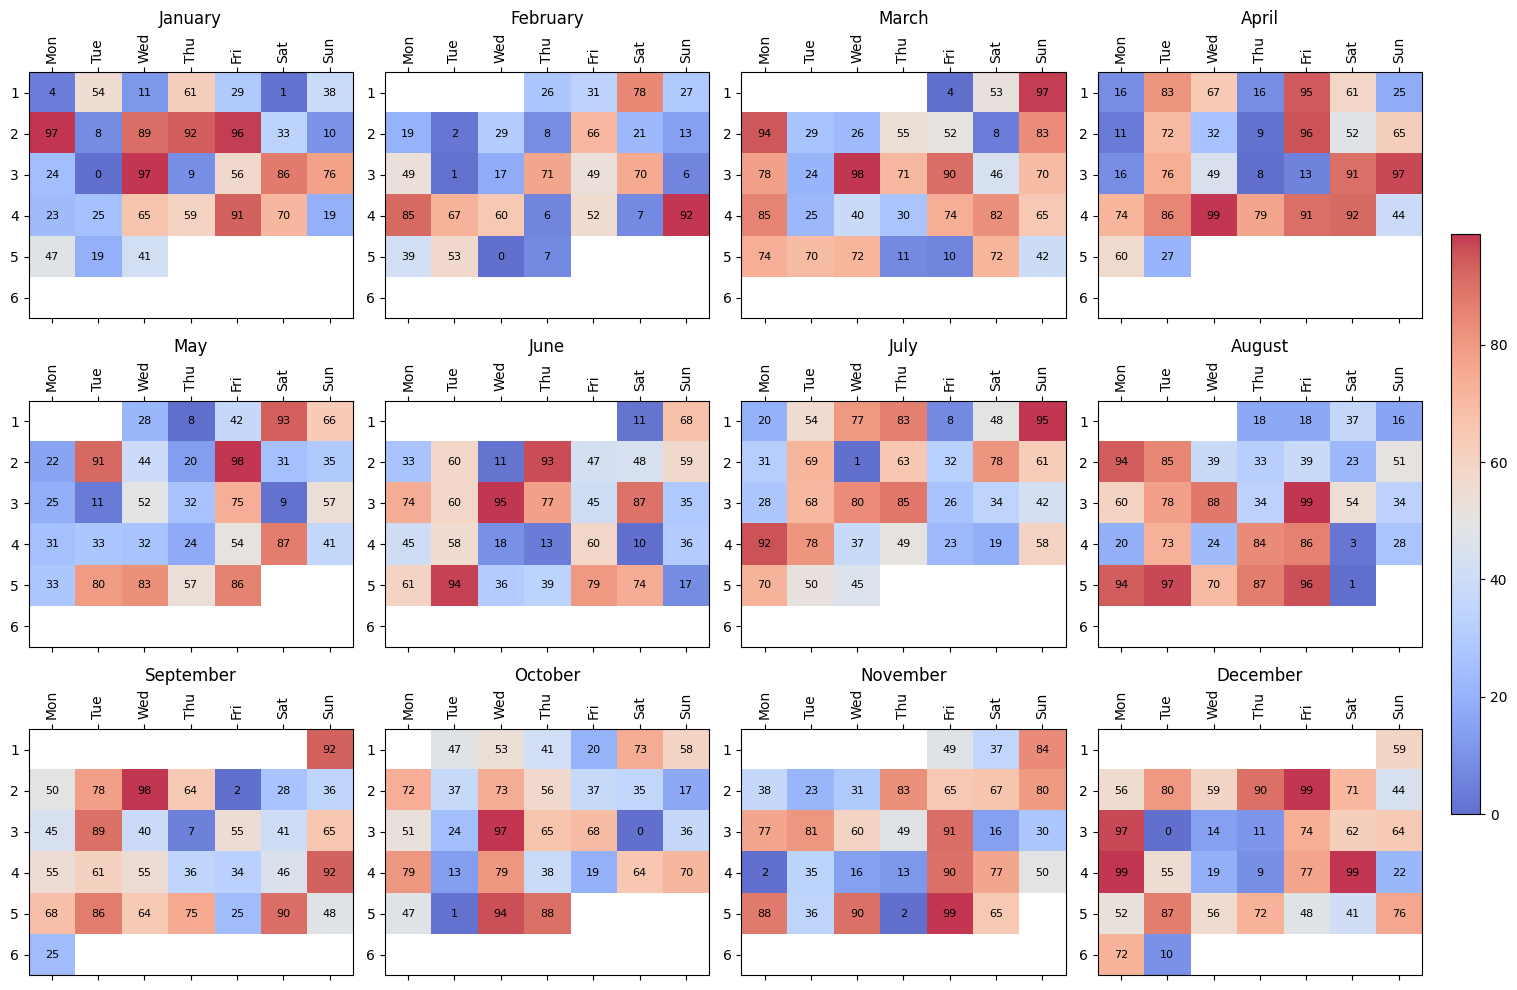

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# 📅 Generate sample data
dates = pd.date_range(start="2024-01-01", end="2024-12-31")
data = np.random.randint(0, 100, len(dates))

data_df = pd.DataFrame({"date": dates, "value": data})
data_df["day"] = data_df["date"].dt.day
data_df["month"] = data_df["date"].dt.month
data_df["weekday"] = data_df["date"].dt.weekday  # 🗓️ Monday = 0, Sunday = 6

# 🔥 Function to plot calendar heatmap
def plot_calendar_heatmap(data, year):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
    axes = axes.flatten()
    
    months = list(calendar.month_name)[1:]  # 📆 Get month names (skip empty index 0)
    
    for month_idx, month in enumerate(months):
        ax = axes[month_idx]
        month_data = data[data['month'] == month_idx + 1]
        
        # 🗓️ Create a matrix of days
        days_in_month = calendar.monthrange(year, month_idx + 1)[1]
        first_weekday = calendar.monthrange(year, month_idx + 1)[0]
        calendar_matrix = np.full((6, 7), np.nan)  # Max 6 weeks, 7 days
        
        for day in range(1, days_in_month + 1):
            week, weekday = divmod(first_weekday + day - 1, 7)
            value = month_data.loc[month_data['day'] == day, 'value'].sum()
            calendar_matrix[week, weekday] = value
        
        cax = ax.matshow(calendar_matrix, cmap='coolwarm', aspect='auto', alpha=0.8)  # 🎨 Heatmap color
        ax.set_title(f"{month} 📊")
        ax.set_xticks(range(7))
        ax.set_yticks(range(6))
        ax.set_xticklabels(list(calendar.day_abbr), rotation=90)
        ax.set_yticklabels(range(1, 7))
        
        # 🖊️ Add values inside the heatmap cells
        for (i, j), val in np.ndenumerate(calendar_matrix):
            if not np.isnan(val):
                ax.text(j, i, f"{int(val)}", ha='center', va='center', fontsize=8)
    
    plt.tight_layout()
    fig.colorbar(cax, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)  # 🌡️ Color bar
    plt.show()

# 🖥️ Plot the calendar heatmap for the year 2024
plot_calendar_heatmap(data_df, 2024)
